# Polynomial Regression

An algorithm to train a *Linear Model* which doesn't fit a straight line *(majority of the cases)*. We add powers to each of the features in order to create new features and then train the linear model on this extended set of features.

## Preparing the data

In [1]:
import numpy as np
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1)

### Visualizing the data

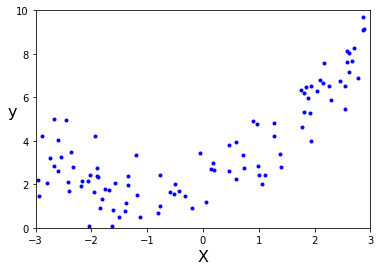

In [2]:
import matplotlib.pyplot as plt
plt.plot(X, y, "b.")
plt.xlabel("X", fontsize=16)
plt.ylabel("y", fontsize=16, rotation=0)
plt.axis([-3, 3, 0, 10])
plt.show()

As we can see, a starign line will not fit the curve perfectly. So we will be using **Polynomial Regression**.

## Implemeting Polynomial Regression 

We will be using `PolynomialFeatures` from `sklearn` in order to add the polynomial features

[Link to Scikit Learn: `PolynomialFeatures`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

In [3]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

Comparing the two values *(one without polynomial features and one with)

In [4]:
print(f'Original: {X[0]}')
print(f'PolyFeatures: {X_poly[0]}')

Original: [-1.68683247]
PolyFeatures: [-1.68683247  2.84540377]


X_poly contains the original feature plus the square of this feature, since we chose `degree`=2

Now, we can fit a `LinearRegression` model to this extended training data

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(f'Intercept: {lin_reg.intercept_}')
print(f'Coefficient: {lin_reg.coef_}')

Intercept: [2.00731944]
Coefficient: [[0.95512261 0.48329889]]


When there are multiple features, Polynomial Regression is capable of finding relationships between the features. This is made possible since `PolynomialFeatures` also adds all combination of features up to the given degree. For example, if there were two feaures a and b, `PolynomialFeatures` with `degree`=3 would not only add the features, $a^2$, $a^3$, $b^2$, and $b^3$, but also the combination $ab$, $a^2b$, and $ab^2$.

## Visualizing the result

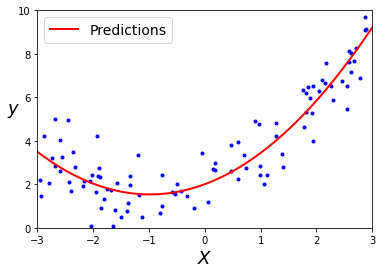

In [6]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)  # Creating a grid of values in order to plot and get predictions
X_new_poly = poly_features.transform(X_new)  # Applying the PolynomialFeatures to the new grid values
y_new = lin_reg.predict(X_new_poly)  # Getting predictions for those new Polynomial Features
plt.plot(X, y, "b.")  # Plotting the original graph
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")  # Plotting the prediction
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

## Evaluating your model

We can use **cross-validation** to get an estimate of a model's general performace. 
- If a model performs well on the trainig data but generalizes poorly, then the model is overfitting
- If it performs poorly on both, then it is underfitting

Another way is to use **Learning Curves**
- These are the plots of model's performance on the training set and the validation set as a function of training set size
- To generate the plot, we need to train the model several times on different sized subsets of the training set.

## Learning Curves

Let's implement the learning curves for the above model

In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)

## Learning Curves for a Linear Regression Model
*(Since we know the data is quadratic in nature, we expect the Linear Model to underfit the data)*

Let's create and process a normal Linear Regression Model

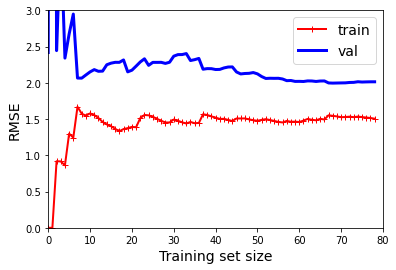

In [8]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

Looking at the graph above we can see:
- Training Set:
    - When there are only one or two instances in the training set, the model can fit them perfectly that's why the curve starts at 0
    - As new instances are added in RMSE *(error)* starts increasing as it's impossible for the model to fit the data perfectly
    - The error keeps on increases utill it reaches a plateau, at which point adding new instances to the training set doesn't effect the average error
- Valuation Set:
    - When there are only few instances in the training set, it is not capable of generalizing properly, that's why we see a huge RMSE at the beginning
    - As more values are added in, the model is capable to generalize a little better and the error goes down
    - The error then remains constant as a starigt line can't fit the data properly
- The gap between the Training Set and Valuation Set is very close, this is typical when the model is **Underfitting**

### Learning Curves for a Polynomial Regression Model
*(we will use a higher degree model so that we can see how an overfitting chart looks like)*

Let's create a pipeline for the Polynomial Regression Model and plot the learning curves

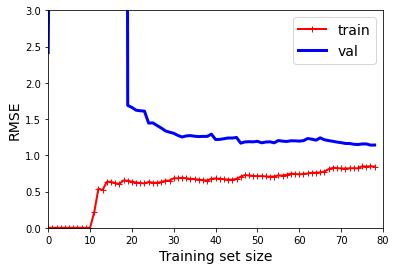

In [9]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
])
plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

Looking at the graph above:
- The error on the trainig set is much lower than the Linear Regression model
- There is gap between the curves. This means that the model performs significantly better on the training set than on the validation set, which is a sign of **Overfitting** the data
- One way to improve an overfitting the model is to feed more training data untill the validation error meets the training error

---

## Credits

- All the credit goes to "Hands-On Machine Learning withScikit-Learn, Keras, andTensorFlow" book by "Aurélien Géron"
- I went through Chapter 4: Traning Models for the above notes